In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Load Data

In [73]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target 

In [74]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X.shape,y.shape

((70000, 784), (70000,))

### Normalize data

In [76]:
X= X /255

### One hot encoding

In [81]:
# Convert y to integer type
y = y.astype(int)

# Number of classes (digits 0-9 → 10 classes)
num_classes = 10

# Create an array of zeros (one-hot encoding format)
y_one_hot = np.zeros((y.size, num_classes))

# Assign 1s using advanced indexing
y_one_hot[np.arange(y.size), y] = 1

print(y_one_hot.shape) 
print(y_one_hot[:5]) 

(70000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Zero classifier

In [86]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

## Split Data

In [87]:
m = 60000
m_test = X.shape[0] - m


X_train , X_test = X[:m].T , X[m:].T 
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [105]:
X_train[3]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 3, Length: 784, dtype: float64

In [95]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.]])

## Plot

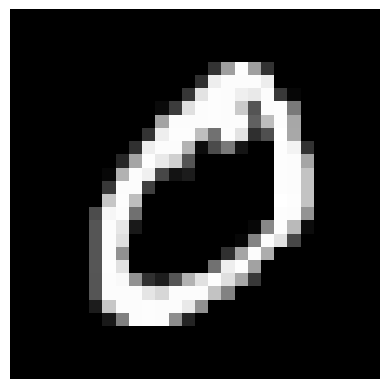

[1.]


In [117]:
i = 1
plt.imshow(np.array(X_train[i]).reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
print(y_train[:,i])